In [1]:
import pandas as pd
#pd.set_option("display.max_rows", None)
import re
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
#from warnings import filterwarnings 
#filterwarnings('ignore')
#from sklearn.linear_model import LogisticRegression 
#from sklearn.model_selection import train_test_split 
#from sklearn.preprocessing import StandardScaler

LOADING BOTH THE RAW DATA AND THE CLEANED DATA FOR VISUALIZATION 

In [2]:
##the cleaned data for decision making
df = pd.read_csv('peakd_data_final.csv') #
df["YEAR_BUILT"]=df["YEAR_BUILT"].values.astype(np.int64)
peakd_data=df

###the complete raw data for time dimension analysis 
time_data = pd.read_csv('edmundsen_leads.csv') 


/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


DESCRIBING THE DATA AT FIRST GLANCE 

In [3]:
peakd_data.describe(include='object')

,date,OEM,MODEL,newness_type,EXTCOLOR,INTCOLOR
count,656142,656142,656137,656142,656142,656142
unique,1171,74,970,3,936,936
top,2/28/21,TOYOTA,CIVIC,unknown_type,unknown,unknown
freq,1498,93971,21057,361674,641536,641536


In [4]:
peakd_data.shape[0]

656142

STARTING THE VISUALIZATION
1. First I look at the entire uncleaned data set and check the trend of hits over time 
 

In [5]:
def hit_per_month(data):
    '''This plots the hit per month'''
    #Read the csv
    df=data
    #Convert it to dataframe
    df=pd.DataFrame(data)
    #Convert the date string to year-months-date
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
    #Group by year month
    grouped = df.groupby(df.date.dt.to_period("M"))
    #sum the columns
    res = grouped.sum()
    
    #Get the index
    date=res.index.astype("datetime64[ns]")
    #Get the hit
    hits=list(res['hits'])

    #Plot your graph
    sns.lineplot(date, hits)
    plt.xlabel('date')
    plt.xticks(rotation=90)
    plt.ylabel('hits')
    plt.title("Hits per month through out the duration")
    #plt.show()
    plt.savefig('hit_month.pdf', format='png', dpi=150, bbox_inches='tight')
    plt.show()

    

/Users/mayorbaba/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


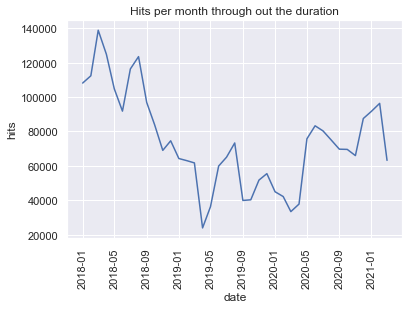

In [6]:
#NUMBER OF HITS PER MONTH##
hit_per_month(time_data)

INTERPRETATION
1. The graph shows a ver strong downward trend in number of hits per month between May-2018 and May-2019. followed by random movement in hits per month that increased on average between 2019 and 2021.
this could be strongly related to the economic effect of the corona pandemic. People lost their jobs and there was general negative effect on the global economy.

TOP TEN CAR MAKERS (OEM)
2. I create the function to enable me see the bar chat and stream line to the the 
numbe of items I want to see

In [7]:
def plotOEM(data, numb):
    '''This plots the hit per month'''
    #Read the csv
    df=data
    pivoter=df.groupby('OEM').sum()
    p2 = pivoter.sort_values('hits',ascending = False)[0:numb]
    print(p2)
    #sum the columns
    p2.to_csv('new.csv')

    X=p2.index
    y=list(p2['hits'])

    #Plot your graph
    plt.bar(X, y)
    #plt.plot(date, hits, color='red')
    plt.xlabel('OEM')
    plt.xticks(rotation=90)
    plt.ylabel('hits')
    plt.title("Top Ten OEM by Hits through the duration")
    plt.savefig('hit_oem.pdf', format='pdf', dpi=150, bbox_inches='tight')

             YEAR_BUILT      hits
OEM                              
HONDA     -9.223372e+18  200453.0
TOYOTA    -6.253959e+19  192984.0
CHEVROLET  1.164088e+08   87121.0
FORD      -2.766991e+19   84772.0
SUBARU     6.688935e+07   68369.0
NISSAN    -7.183172e+18   64920.0
JEEP       6.162169e+07   52071.0
HYUNDAI    2.020000e+16   48487.0
KIA       -2.767012e+19   43523.0
AUDI       4.634375e+07   40795.0


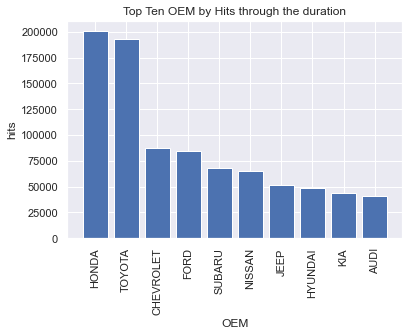

In [8]:
plotOEM(peakd_data, 10)

In [19]:
def plotOEMl(data, numb):
    '''This plots the hit per month'''
    #Read the csv
    #streamline=df.groupby('OEM').sum()
    #pivot = pd.to_dataframe(streamline)
    df=data
    group=pd.DataFrame(df.groupby('OEM')['hits'].sum())
    pivoter = group[group['hits']>9]
    #pivoter = streamline(streamline['hits']>3)
    p2 = pivoter.sort_values('hits',ascending = True)[0:numb ]
    print(p2)
    #sum the columns
    #p2.to_csv('new.csv')

    X=p2.index
    y=list(p2['hits'])

    #Plot your graph
    plt.bar(X, y,color='green')
    #plt.plot(date, hits, color='red')
    plt.xlabel('OEM')
    plt.xticks(rotation=90)
    plt.ylabel('hits')
    plt.title("Bottom 10 OEM by Hits through the duration")
    plt.show()
    #plt.savefig('hit_oem.pdf', format='pdf', dpi=150, bbox_inches='tight')

BOTTOM TEN CAR MAKERS (OEM)

         hits
OEM          
GEO        20
ASTON      20
DAEWOO     42
SUV        74
SAAB       83
CARS      154
MAYBACH   177
LOTUS     189
MCLAREN   263
FISKER    278


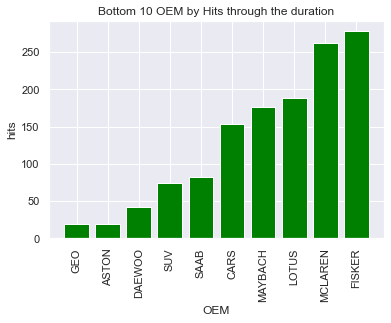

In [20]:
plotOEMl(peakd_data, 10)

In [17]:
def plotMOT(data, numb):
    '''This plots the hit per month'''
    #Read the csv
    df=data
    pivoter=pd.DataFrame(df.groupby('MODEL')['hits'].sum())
    p2 = pivoter.sort_values('hits',ascending = False)[0:numb]
    print(p2)
    #sum the columns
    p2.to_csv('new.csv')

    X=p2.index
    y=list(p2['hits'])

    #Plot your graph
    plt.bar(X, y)
    #plt.plot(date, hits, color='red')
    plt.xlabel('MODEL')
    plt.xticks(rotation=90)
    plt.ylabel('hits')
    plt.title("Top Ten MODEL by Hits through the duration")
    plt.savefig('hit_oem.pdf', format='pdf', dpi=150, bbox_inches='tight')

             hits
MODEL            
CIVIC       47782
ACCORD      45580
RAV4        35341
CAMRY       30185
CR-V        26876
WRANGLER    25492
PILOT       25224
HIGHLANDER  25079
ODYSSEY     22796
TACOMA      20244


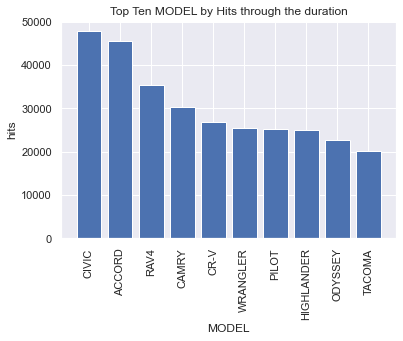

In [18]:
plotMOT(peakd_data, 10)

                                INSIGHT
By comparing this to the summary output, we would see that the ranking model is a TOYOTA model car(CIVIC)
However when all the hits per model are group together by their maker, we see as shown by the graph for OEM that
HONDA is leading total afterall.

In [58]:
def plotMOB(data, numb):
    '''This plots the hit per month'''
    #Read the csv
    #streamline=df.groupby('OEM').sum()
    #pivot = pd.to_dataframe(streamline)
    df=data
    group=df.groupby('MODEL').sum()
    pivoter = group[group['hits']>9]
    #pivoter = streamline(streamline['hits']>3)
    p2 = pivoter.sort_values('hits',ascending = True)[0:numb ]
    print(p2)
    #sum the columns
    #p2.to_csv('new.csv')

    X=p2.index
    y=list(p2['hits'])

    #Plot your graph
    plt.bar(X, y, color='green')
    #plt.plot(date, hits, color='red')
    plt.xlabel('MODEL')
    plt.xticks(rotation=90)
    plt.ylabel('hits')
    plt.title("Bottom 10 MODEL by Hits through the duration")
    plt.show()
    #plt.savefig('hit_oem.pdf', format='pdf', dpi=150, bbox_inches='tight')

                  YEAR_BUILT  hits
MODEL                             
BLACK                10065.0  10.0
FX45                 16051.0  10.0
HS                   10050.0  10.0
JETTA-SPORTWAGEN     10064.0  10.0
X-TYPE               10021.0  10.0
BMW                   2033.0  10.0
ARNAGE               18037.0  10.0
LS-500H              12112.0  11.0
METRO                15983.0  11.0
DIAMANTE             14018.0  11.0


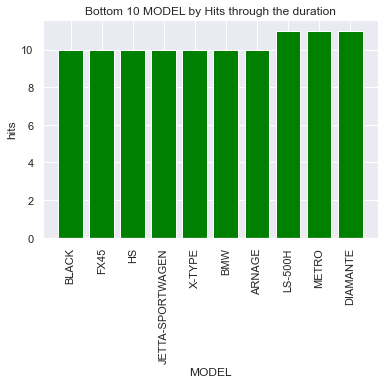

In [59]:
plotMOB(peakd_data, 10)

GROUPING BY YEAR TO SEE THE YEAR WITH MOST HITS


In [61]:
def plotY(data, numb):
    '''This plots the hit per month'''
    df=data
    pivoter=df.groupby('YEAR_BUILT').sum()
    p2 = pivoter.sort_values('hits',ascending = False)[0:numb]
    print(p2)
    #sum the columns
    #p2.to_csv('new.csv')

    X=p2.index
    y=list(p2['hits'])
    color='purple'
    #Plot your graph
    plt.bar(X, y, color=color)
    #plt.plot(date, hits, color='red')
    plt.xlabel('YEAR_BUILT')
    plt.xticks(rotation=90)
    plt.ylabel('hits')
    plt.title("Top Hits by Year of Built through the duration")
    plt.show()
    #plt.savefig('hit_oem.pdf', format='pdf', dpi=150, bbox_inches='tight')

              hits
YEAR_BUILT        
2018        333055
2019        270810
2020        193782
2017        121938
2016         63233
2015         52615
2014         32782


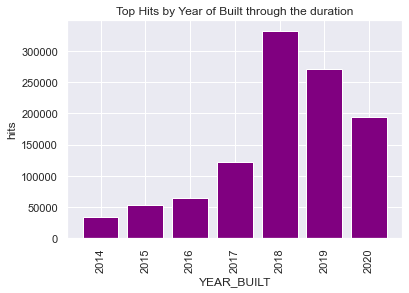

In [62]:
plotY(peakd_data, 7)

INSIGHT FROM THE GRAPH
Assumption is that the latest cars are more expensive and thus would have fewer hits. also cars that are two old would have lesser hits but the cars that are not to old and also not the latest would have the highest hit and this is proven and shown by the graph.

HITS BY CNEWNESS OF CAR (WHETHER NEW OR USED LABEL)

In [21]:
def plotPie(data, numb):
    '''This plots the hit per month'''
    #Read the csv
    #data=pd.read_csv(path_csv)
    df=data
    #Convert it to dataframe
    #df=pd.DataFrame(data)
    pivoter=pd.DataFrame(df.groupby('newness_type')['hits'].sum())
    p2 = pivoter.sort_values('hits',ascending = False)[0:numb]
    print(p2)
    #sum the columns
    #p2.to_csv('new.csv')

    labels= 'new', 'used', 'unknown'
    y=list(p2['hits'])
    myexplode = [0.2, 0, 0]
    mycolors = ["black","#4CAF50", "hotpink"]
    
    #Plot your graph
    plt.pie(y, labels = labels, explode = myexplode, colors = mycolors, shadow = True, startangle = 50)
    #plt.plot(date, hits, color='red')
    plt.xlabel('Type')
    plt.xticks(rotation=90)
    plt.ylabel('hits')
    plt.title("New/Used' by Hits through the duration")
    plt.show()
    #plt.savefig('hit_oem.pdf', format='pdf', dpi=150, bbox_inches='tight')

                hits
newness_type        
new           607350
unknown_type  449242
used          220781


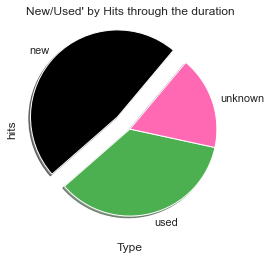

In [22]:
plotPie(peakd_data, 10)

PLOTTING THE COLOR 

In [23]:
def plotINTCOL(data, numb):
    '''This plots the hit per month'''
    #Read the csv
    #data=pd.read_csv(path_csv)
    df=data
    #Convert it to dataframe
    #df=pd.DataFrame(data)
    pivoter=pivoter=pd.DataFrame(df.groupby('INTCOLOR')['hits'].sum())
    p2 = pivoter.sort_values('hits',ascending = False)[0:numb]
    print(p2)
    #sum the columns
    #p2.to_csv('new.csv')

    #labels= 'new', 'used', 'unknown'
    y=list(p2['hits'])
    #myexplode = [0.2, 0, 0]
    #mycolors = ["black","#4CAF50", "hotpink"]
    
    #Plot your graph
    plt.pie(y, shadow = True, startangle = 50)
    #plt.plot(date, hits, color='red')
    plt.xlabel('Type')
    plt.xticks(rotation=90)
    plt.ylabel('hits')
    plt.title("Interior color by Hits through the duration")
    plt.show()
    #plt.savefig('hit_oem.pdf', format='pdf', dpi=150, bbox_inches='tight')

             hits
INTCOLOR         
unknown   1168287
platinum    12957
super        4461
blizzard     3465
crystal      2653
lunar        2369
alpine       2253
oxford       2241
white        2174
summit       2040


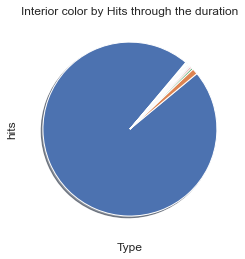

In [24]:
plotINTCOL(peakd_data, 10)   

OTHER ANALYSIS 
1.CHECKING GROUP RANGE TO SEE THE MODELS CONTAINED, BETTER ON TABLEAU 

In [154]:
grp = peakd_data.groupby(['OEM', 'MODEL'])

In [155]:
#grp = peakd_data.groupby(['OEM', 'MODEL'], sort=False)
#grp.get_group(peakd_datagroupby('OEM').last().iloc[-1].name)
grp.last().iloc[-40:-26].index

#gp.get_group(df.groupby('a').last().iloc[-1].name)

MultiIndex([('VOLKSWAGEN',              'GTI'),
            ('VOLKSWAGEN',            'JETTA'),
            ('VOLKSWAGEN',        'JETTA-GLI'),
            ('VOLKSWAGEN', 'JETTA-SPORTWAGEN'),
            ('VOLKSWAGEN',              'NEW'),
            ('VOLKSWAGEN',           'PASSAT'),
            ('VOLKSWAGEN',          'PHAETON'),
            ('VOLKSWAGEN',              'R32'),
            ('VOLKSWAGEN',           'RABBIT'),
            ('VOLKSWAGEN',           'ROUTAN'),
            ('VOLKSWAGEN',           'TIGUAN'),
            ('VOLKSWAGEN',   'TIGUAN-LIMITED'),
            ('VOLKSWAGEN',          'TOUAREG'),
            ('VOLKSWAGEN',          'UNKNOWN')],
           names=['OEM', 'MODEL'])